In [92]:
import pandas as pd
import numpy as np
import os 
os.chdir ('D:\DATA SCIENCE\housing prediction')
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew,norm
from scipy.stats.stats import pearsonr

In [93]:
train = pd.read_csv("datatrain.csv")
test = pd.read_csv("datatest.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [94]:
#save the ID column
train_ID = train['Id']
test_ID = test['Id']

#Drop the ID column since it is unnecessary for the prediction process
train.drop("Id",axis =1,inplace = True)
test.drop("Id",axis =1,inplace= True)

In [95]:
print ("Train data: \n")
print ("Number of columns: " + str (train.shape[1]))
print ("number of rows: " + str (train.shape[0]))

print('\nTest data: \n')
print ("number of columns:" + str (test.shape[1]))
print ("Number of columns:" +  str (test.shape[0]))

Train data: 

Number of columns: 80
number of rows: 1460

Test data: 

number of columns:79
Number of columns:1459


In [96]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [97]:
#descriptive statistics summary
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

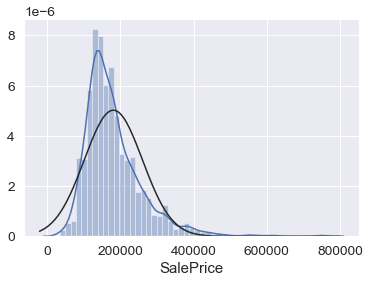

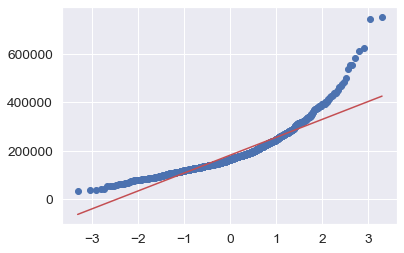

skewness: 1.882876
kurtosis: 6.536282


In [98]:
# kernel density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel =('Frequency')
plt.title = ('SalePrice Distribution');
#Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice']);
#QQ plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

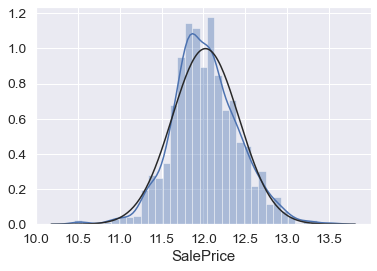

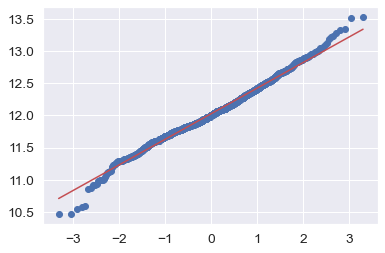

In [99]:

#log transform the target 
train["SalePrice"] = np.log1p(train["SalePrice"])

#Kernel Density plot
sns.distplot(train.SalePrice,fit=norm);
plt.ylabel=('Frequency')
plt.title=('SalePrice distribution');
#Get the fitted parameters used by the function
(mu,sigma)= norm.fit(train['SalePrice']);
#QQ plot
fig =plt.figure()
res =stats. probplot(train['SalePrice'], plot=plt)
plt.show()

In [100]:
print("skewness: %f" % train['SalePrice'].skew())
print("kurtosis: %f" % train ['SalePrice'].kurt())

skewness: 0.121347
kurtosis: 0.809519


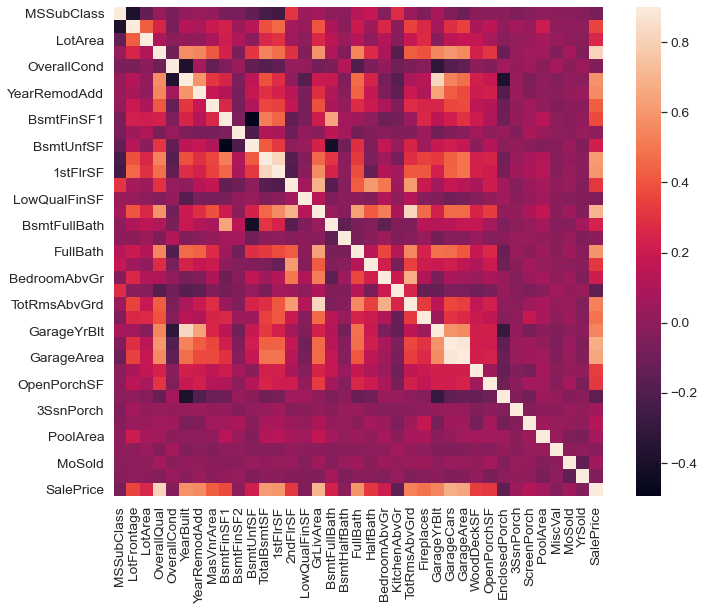

In [101]:
#correration matrix
corrmat = train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat,vmax=0.9, square=True)
plt.show()

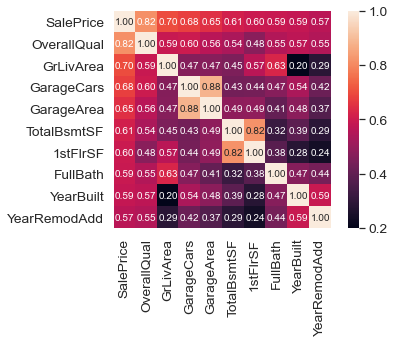

In [102]:
cols = corrmat.nlargest(10, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values,
                 xticklabels=cols.values)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


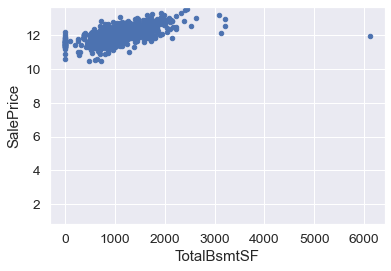

In [103]:
var ='TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]],axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim =0.800000)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


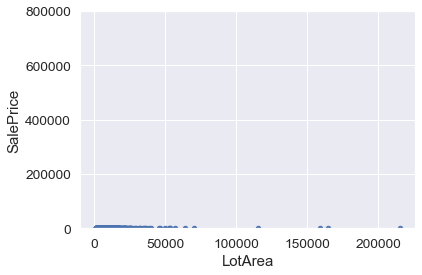

In [104]:
#scatter plot LotArea/salePrice
var = 'LotArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x= var, y='SalePrice', ylim =(0,800000));
plt.show();

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


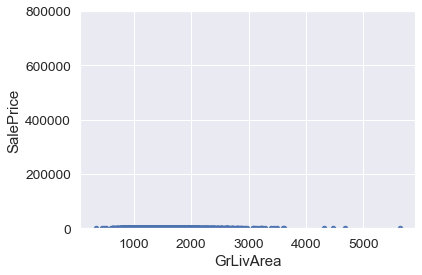

In [105]:
#scatter plot GrLivArea/salePrice
var ='GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000));
plt.show()

In [106]:
#Deleting Outliers of GrLivArea
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

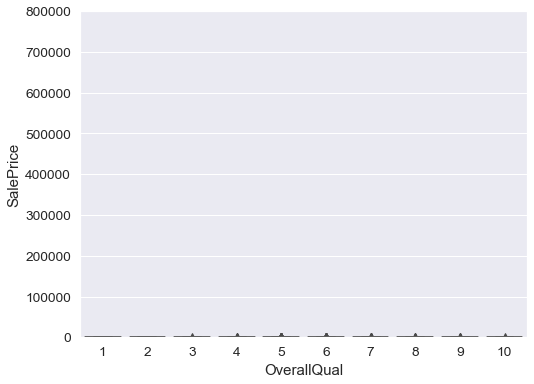

In [107]:

#box plot overallqual/salePrice
var = 'OverallQual'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
f, ax =plt.subplots(figsize=(8,6))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.show();

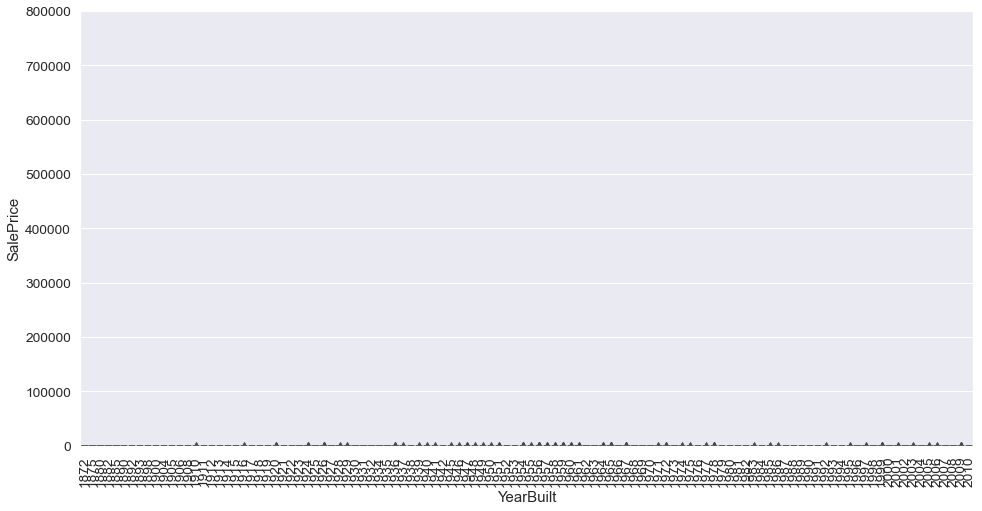

In [108]:
#year built
var  = 'YearBuilt'
data= pd.concat([train['SalePrice'], train[var]], axis =1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y='SalePrice', data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90);
plt.show()

In [109]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,12.247699
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,12.109016
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,12.317171
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,11.849405
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,12.429220


In [110]:
all_data = pd.concat((train.loc[:, 'MSSubClass': 'SaleCondition'],
                     test.loc[:,'MSSubClass':'SaleCondition']))
print("all_data size is: {} ".format(all_data.shape))
all_data_na = (all_data.isnull().sum()/ len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending = False)
# [:30]
missing_data =pd.DataFrame({'Missing Raio':all_data_na})
missing_data.head(20)

all_data size is: (2915, 79) 


,Missing Raio
PoolQC,99.725557
MiscFeature,96.397942
Alley,93.207547
Fence,80.445969
FireplaceQu,48.713551
LotFrontage,16.672384
GarageFinish,5.454545
GarageYrBlt,5.454545
GarageQual,5.454545
GarageCond,5.454545


In [111]:
for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish',
           'GarageQual','GarageCond','MasVnrType','MSSubClass'):
    all_data[col] = all_data[col].fillna('None')

In [112]:
#Replacing missing value with 0(since no garage = no cars in such garage)
for col in ('GarageYrBlt','GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)

#missing values are likely zero for no basement 
for col in ('BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF','BsmtFullBath',
            'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)

#
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)

#for below categorical basement-related feature NaN means that there is no basement 
for col in ('BsmtQual', 'BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
    
#group by Neigborhood and fill missing value with median Lot frontage of all the neighboorhood
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(
lambda x: x.fillna(x.median()))

In [113]:
#msZoning classification: 'RL' is common
all_data ['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

#functional: NA is typical
all_data["Functional"] = all_data["Functional"].fillna('Typ')

#Electrical
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

#KitchenQual
all_data['KitchenQual'] =all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

#Extrerior !st and Exterior 2nd
all_data ['Exterior1st']= all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd']= all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])

#sale type
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [114]:
#dropping as same value 'AllPub' for all records except 2NA and 1 'NoSeWa'
all_data = all_data.drop(['Utilities'], axis=1)

In [115]:
#Transforming required numerical features to categorical 
all_data['MSSubClass']= all_data['MSSubClass'].apply(str)
all_data['OverallCond'] =all_data['OverallCond'].astype(str)
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [116]:

#Label Encoding some categorical variables
#for information in their ordering set

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
#apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))
#shape
print('Shape all_data: {}'.format(all_data.shape))

Shape all_data: (2915, 78)


In [117]:
#add total surface area as TotalSf = basement + firstflr + secondflr
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['1stFlrSF'] + all_data['2ndFlrSF']

In [118]:
#log transform skewed numeric features 
numeric_features = all_data.dtypes[all_data.dtypes != "object"].index
skewed_features = all_data[numeric_features].apply(lambda x : skew (x.dropna())).sort_values(ascending=False)
#compute skewness
print ("\skew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_features})   
skewness.head(7)


\skew in numerical features: 



,Skew
MiscVal,21.932147
PoolArea,18.701829
LotArea,13.123758
LowQualFinSF,12.080315
3SsnPorch,11.368094
LandSlope,4.971350
KitchenAbvGr,4.298845


In [119]:
skewness = skewness[abs(skewness) > 0.75]
print ("There are {} skewed numerical features to box cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p 
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)

There are 59 skewed numerical features to box cox transform


In [120]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2915, 220)


In [121]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train= train.SalePrice.values
train = pd.DataFrame(all_data[:ntrain])
test = pd.DataFrame(all_data[ntrain:])

In [122]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone

In [124]:
#validation function
n_folds = 5

def RMSLE_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error",
cv = kf))
    return(rmse)

In [125]:
#lasso
lasso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

#Gradient Boosting Regression
GBoost = GradientBoostingRegressor(loss='huber', learning_rate=0.05, n_estimators=3000,
                                   min_samples_split=10, min_samples_leaf=15,max_depth=4,
                                   random_state=5,max_features='sqrt')

In [126]:
#Lasso
score = RMSLE_cv(lasso)
print ("\n Lasso score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))

#Gradient Boosting Regression
score = RMSLE_cv(GBoost)
print ("\n GBoost score: {:.4f} ({:.4f})\n".format(score.mean(),score.std()))


 Lasso score: 0.1112 (0.0073)


 GBoost score: 0.1151 (0.0075)



In [134]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   


    
# Averaged base models score

averaged_models = AveragingModels(models = (GBoost, lasso))

score = RMSLE_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1081 (0.0072)



In [135]:
#defining RMSLE evaluation function
def RMSLE (y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [136]:
#final training and prediction of the stacked regressor

averaged_models.fit(train.values, y_train) 
stacked_train_pred = averaged_models.predict(train.values)
stacked_pred = np.expm1(averaged_models.predict(test.values))
print("RMSLE score on the train data:") 
print(RMSLE(y_train,stacked_train_pred))
print("Accuracy score:") 
averaged_models.score(train.values, y_train)

RMSLE score on the train data:
0.06981552611401749
Accuracy score:


0.9689084324467042

In [137]:
ensemble = stacked_pred *1
submit = pd.DataFrame()
submit['id'] = test_ID
submit['SalePrice'] = ensemble
submit.to_csv('submission.csv', index = False)
submit.head()

,id,SalePrice
0,1461,120926.738427
1,1462,153388.255998
2,1463,189484.812534
3,1464,198222.932399
4,1465,189467.005352
